# Exploratory Data Analysis of Mid-Semester-Marks
 M.Tech AI&DS Semester 1 

## Contents

- Statistical Information
- Distributions
- Box Plots
- Outlier Detection
- Skewness and Kurtosis

## 1. Importing the Dataset

In [14]:
import pandas as pd

file_path = r"Mid-Sem-Marks-Dataset.xlsx"
data = pd.read_excel(file_path)

print(data.head())


   RegNo   FDE   MLO    EC  RLMAS   XAI  Total(250)
0  MA001  36.0  19.0  34.0   33.0  37.0         159
1  MA002   NaN   NaN   NaN    NaN   NaN           0
2  MA003  36.0  22.0  27.0   25.0  36.0         146
3  MA004   NaN   NaN   NaN    NaN   NaN           0
4  MA005  50.0  45.0  44.0   50.0   NaN         189


## 2. Statistical Summary of the Data

In [2]:
statistical_summary = data.describe()
print(statistical_summary)


             FDE       MLO         EC      RLMAS        XAI  Total(250)
count  12.000000  12.00000  12.000000  12.000000   7.000000   16.000000
mean   42.666667  33.75000  36.166667  37.166667  39.571429  129.625000
std     4.539390   9.91899   6.644661   8.099757   4.157609   79.172281
min    36.000000  19.00000  23.000000  25.000000  36.000000    0.000000
25%    40.000000  23.50000  32.500000  32.250000  36.500000  109.500000
50%    42.000000  35.00000  38.000000  37.000000  40.000000  162.000000
75%    47.000000  41.50000  41.250000  43.000000  40.000000  183.500000
max    50.000000  47.00000  44.000000  50.000000  48.000000  214.000000


## 3. Subject wise Distributions

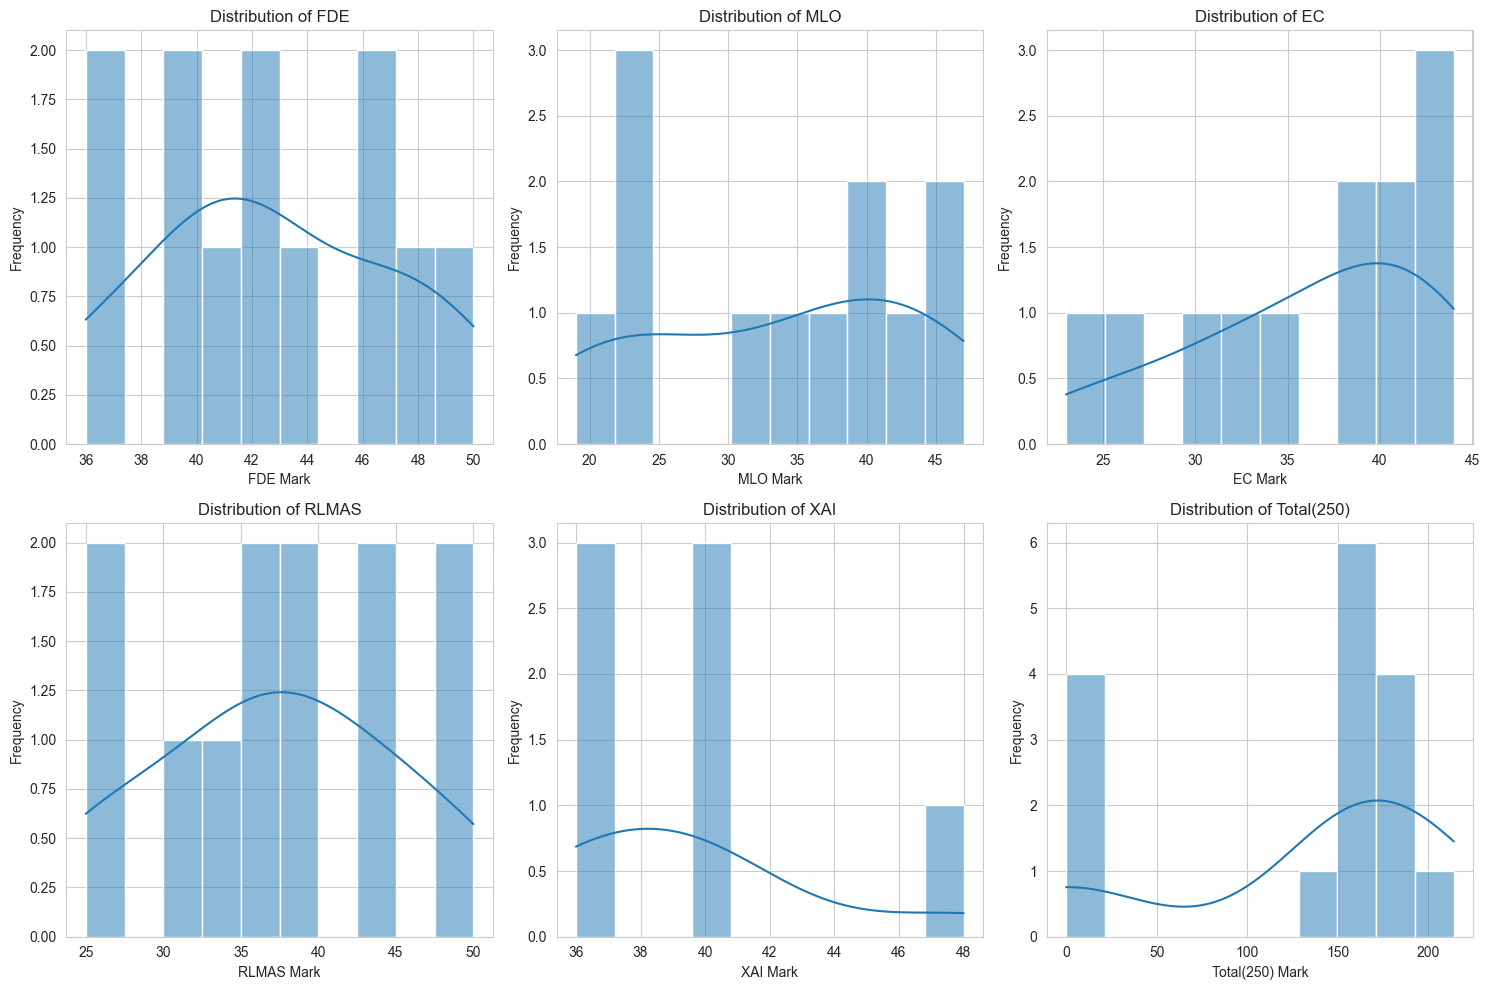

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

plt.figure(figsize=(15, 10))
subjects = ['FDE', 'MLO', 'EC', 'RLMAS', 'XAI', 'Total(250)']

for i, subject in enumerate(subjects, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[subject], kde=True, bins=10)
    plt.title(f'Distribution of {subject}')
    plt.xlabel(f'{subject} Mark')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


These histograms, along with the Kernel Density Estimate (KDE) curves, show the frequency distribution of scores for each subject and the total marks. Each bar represents the number of students falling within the range of marks on the x-axis.

### Interpretation:

- FDE: Scores are somewhat uniformly distributed, indicating a consistent performance among students.
- MLO: The distribution is slightly left-skewed with a higher frequency of lower scores.
- EC: There is a concentration of scores around 30 to 35, with fewer students obtaining higher marks.
- RLMAS: The distribution appears fairly normal, with most scores centered around the median.
- XAI: The data is sparse, but there is a peak at the higher score range, suggesting a few students did exceptionally well.
- Total(250): The distribution is bimodal, reflecting two groups of student performance, possibly separating those who attended all exams from those who missed some.

## 4. Box Plot for All Subjects

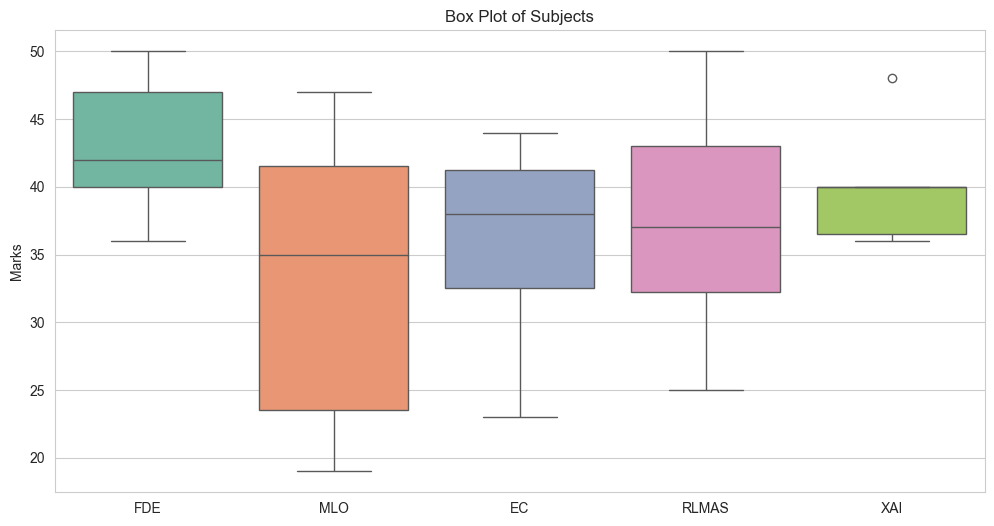

In [4]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[subjects[:-1]], palette="Set2")  # Excluding the total marks
plt.title('Box Plot of Subjects')
plt.ylabel('Marks')
plt.show()


The box plot visualizes the spread of scores in each subject, showing the median, quartiles, and outliers.

### Interpretation:

- FDE: The scores are tightly packed around the median, with a fairly symmetrical distribution.
- MLO: There's a wider range in scores, with a slightly lower median compared to FDE.
- EC: Similar spread as MLO, but the median score is higher.
- RLMAS: The scores are more spread out with the median closer to the third quartile, indicating a left skew.
- XAI: Shows the least variation in scores and the presence of a potential outlier, indicated by the dot.

## 5. Outlier Detection (using Z-Score and IQR)

- Z-Score: Identifies outliers by finding data points that are a certain number of standard deviations away from the mean. An absolute Z-Score greater than 3 is commonly considered an outlier.
- IQR: Determines outliers using the interquartile range. Data points that are below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR are considered outliers.

In [5]:
from scipy import stats
import numpy as np

z_scores = stats.zscore(data[subjects[:-1]].dropna())
outliers_z = (np.abs(z_scores) > 3)
outliers_z_df = pd.DataFrame(data[subjects[:-1]].dropna()[outliers_z.any(axis=1)])
print("Outliers identified by Z-Score:")
print(outliers_z_df)

Q1 = data[subjects[:-1]].quantile(0.25)
Q3 = data[subjects[:-1]].quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = (data[subjects[:-1]] < (Q1 - 1.5 * IQR)) | (data[subjects[:-1]] > (Q3 + 1.5 * IQR))
outliers_iqr_df = pd.DataFrame(data[subjects[:-1]][outliers_iqr.any(axis=1)])
print("\nOutliers identified by IQR:")
print(outliers_iqr_df)


Outliers identified by Z-Score:
Empty DataFrame
Columns: [FDE, MLO, EC, RLMAS, XAI]
Index: []

Outliers identified by IQR:
     FDE   MLO    EC  RLMAS   XAI
14  42.0  33.0  38.0   30.0  48.0


### Z-Score Based Outlier Detection:
This method did not detect any outliers, which means that all scores are within a threshold that is considered normal in terms of the number of standard deviations from the mean.

### IQR Based Outlier Detection:
Only one outlier was detected using this method, which is for the "XAI" subject. The student's score is significantly higher than the others.

## 6. Measuring Skewness and Kurtosis

- Skewness: A measure of the asymmetry of the probability distribution. A distribution is symmetrical if it looks the same to the left and right of the center point.
- Kurtosis: A measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution. High kurtosis means more of the variance is due to infrequent extreme deviations, as opposed to frequent modestly sized deviations.

In [6]:
skewness = data[subjects[:-1]].skew()
kurtosis = data[subjects[:-1]].kurtosis()
print("\nSkewness:")
print(skewness)
print("\nKurtosis:")
print(kurtosis)



Skewness:
FDE      0.085267
MLO     -0.244266
EC      -0.763371
RLMAS   -0.052737
XAI      1.593812
dtype: float64

Kurtosis:
FDE     -0.891457
MLO     -1.541651
EC      -0.328059
RLMAS   -0.738677
XAI      3.058848
dtype: float64


The skewness values suggest that "MLO" and "EC" have a slight left skew, "FDE" and "RLMAS" are fairly symmetrical, and "XAI" has a significant right skew, meaning more students scored below the average for "XAI".

Kurtosis measures the "tailedness" of the distribution. The kurtosis values indicate that "FDE", "MLO", "EC", and "RLMAS" have lighter tails than a normal distribution (negative kurtosis), whereas "XAI" has heavier tails (positive kurtosis), which is also indicated by the outlier in the box plot.

## 7. Own Definations for Different Metrices

In [7]:
import numpy as np

def calculate_skewness(data):
    n = len(data)
    mean = np.mean(data)
    std_dev = np.std(data, ddof=1)  # Using Bessel's correction with ddof=1
    skewness = (np.sum((data - mean) ** 3) / n) / (std_dev ** 3)
    return skewness

def calculate_kurtosis(data):
    n = len(data)
    mean = np.mean(data)
    std_dev = np.std(data, ddof=1)  # Using Bessel's correction with ddof=1
    kurtosis = (np.sum((data - mean) ** 4) / n) / (std_dev ** 4) - 3
    return kurtosis

def calculate_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    return IQR

def calculate_z_scores(data):
    mean = np.mean(data)
    std_dev = np.std(data, ddof=1)  # Using Bessel's correction with ddof=1
    z_scores = (data - mean) / std_dev
    return z_scores

In [8]:
subjects = ['FDE', 'MLO', 'EC', 'RLMAS', 'XAI']


In [9]:
for subject in subjects:
    #subject_data = data[subject].dropna()
    subject_data = data[subject]
    skewness = calculate_skewness(subject_data)
    print(f"Skewness for {subject}: {skewness}")

Skewness for FDE: 0.048850716985855185
Skewness for MLO: -0.13994388916441827
Skewness for EC: -0.4373478980999362
Skewness for RLMAS: -0.030214081506051628
Skewness for XAI: 0.42691385395210224


In [10]:
for subject in subjects:
    #subject_data = data[subject].dropna()
    subject_data = data[subject]
    kurtosis = calculate_kurtosis(subject_data)
    print(f"Kurtosis for {subject}: {kurtosis}")

Kurtosis for FDE: -1.7538229887543257
Kurtosis for MLO: -2.0117127037280365
Kurtosis for EC: -1.530359767993391
Kurtosis for RLMAS: -1.6932253792222478
Kurtosis for XAI: -1.8671185125918397


In [11]:
for subject in subjects:
    #subject_data = data[subject].dropna()
    subject_data = data[subject]
    iqr = calculate_iqr(subject_data)
    print(f"IQR for {subject}: {iqr}")

IQR for FDE: nan
IQR for MLO: nan
IQR for EC: nan
IQR for RLMAS: nan
IQR for XAI: nan


In [12]:
for subject in subjects:
    #subject_data = data[subject].dropna()
    subject_data = data[subject]
    z_scores = calculate_z_scores(subject_data)
    print(f"Z-Scores for {subject}:", z_scores)

Z-Scores for FDE: 0    -1.468626
1          NaN
2    -1.468626
3          NaN
4     1.615489
5          NaN
6          NaN
7    -0.587450
8     1.174901
9    -0.146863
10    0.954607
11   -0.367157
12    0.073431
13    0.954607
14   -0.146863
15   -0.587450
Name: FDE, dtype: float64
Z-Scores for MLO: 0    -1.487047
1          NaN
2    -1.184596
3          NaN
4     1.134188
5          NaN
6          NaN
7    -0.982963
8     0.730921
9     0.932555
10    0.327654
11    1.335821
12    0.630104
13   -1.184596
14   -0.075613
15   -0.176429
Name: MLO, dtype: float64
Z-Scores for EC: 0    -0.326076
1          NaN
2    -1.379554
3          NaN
4     1.178891
5          NaN
6          NaN
7    -1.981541
8     1.028395
9     0.576904
10    0.877898
11    0.727401
12   -0.476573
13   -0.777567
14    0.275911
15    0.275911
Name: EC, dtype: float64
Z-Scores for RLMAS: 0    -0.514419
1          NaN
2    -1.502103
3          NaN
4     1.584410
5          NaN
6          NaN
7    -1.502103
8     0.10